<a href="https://colab.research.google.com/github/Dushyanttara/colab_research/blob/master/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this command might be relevant only on GPU nodes. But the notebook will run on CPU as well 
#If running on CPU remove the command wherever it appears
#H2o provides deployment ready course, mojo, pojo and binary
!nvidia-smi

Mon Mar 16 14:38:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 126.2MB 91kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.3-py2.py3-none-any.whl size=126303006 sha256=ba870e74c692317b5da167f50980bc0d3462bb42c5cb49bfcb59297eb3603894
  Stored in directory: /root/.cache/pip/wheels/fa/7c/ce/95ae52b4d3f1b14a27c3c961c1f94635aee841ab1eec3aeeca
Successfully built h2o


In [0]:
import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgfrvkzgx
  JVM stdout: /tmp/tmpgfrvkzgx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgfrvkzgx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_unknownUser_0oun6a
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('/content/churn_data.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [9]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [0]:
churn_train, churn_test, churn_valid = churn_df.split_frame(ratios = [.7, .15])

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.7,7382.25,No


In [0]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [0]:
aml = H2OAutoML(max_models= 10 , seed = 10, exclude_algos= ["StackedEnsemble", "DeepLearning"], verbosity= "info", nfolds = 0)

In [16]:
!nvidia-smi

Mon Mar 16 14:52:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [17]:
aml.train(x =x, y = y, training_frame= churn_train, validation_frame= churn_valid)

AutoML progress: |
14:53:25.951: Project: AutoML_20200316_145325945
14:53:25.952: Cross-validation disabled by user: no fold column nor nfolds > 1.
14:53:25.952: Setting stopping tolerance adaptively based on the training frame: 0.014250856858528702
14:53:25.952: Build control seed: 10
14:53:25.953: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
14:53:26.58: training frame: Frame key: automl_training_py_3_sid_9198    cols: 21    rows: 4448  chunks: 8    size: 254213  checksum: 5297930617938246158
14:53:26.58: validation frame: Frame key: py_5_sid_9198    cols: 21    rows: 1050  chunks: 8    size: 98292  checksum: -483931244574965820
14:53:26.69: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_9198    cols: 21    rows: 476  chunks: 8    size: 83948  checksum: -2879273804623512111
14:53:26.69: blending frame: NULL
14:53:26.69: response column: Churn
14:53:26

In [18]:
!nvidia-smi

Mon Mar 16 14:54:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |     85MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
lb = aml.leaderboard

In [20]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_20200316_145325,0.901761,0.347978,0.700357,0.160259,0.330572,0.109278
GLM_1_AutoML_20200316_145325,0.898589,0.348175,0.716094,0.173161,0.331063,0.109603
XGBoost_1_AutoML_20200316_145325,0.898341,0.352895,0.698195,0.177303,0.33343,0.111176
GBM_2_AutoML_20200316_145325,0.897903,0.352801,0.670781,0.178795,0.334292,0.111751
XGBoost_2_AutoML_20200316_145325,0.896364,0.353462,0.689359,0.164449,0.33394,0.111516
GBM_5_AutoML_20200316_145325,0.894068,0.35521,0.685041,0.190205,0.334613,0.111966
GBM_1_AutoML_20200316_145325,0.893358,0.357066,0.674446,0.170225,0.335392,0.112487
GBM_4_AutoML_20200316_145325,0.885001,0.365081,0.658664,0.18708,0.342043,0.116994
GBM_3_AutoML_20200316_145325,0.884907,0.36389,0.662132,0.192903,0.339432,0.115214
DRF_1_AutoML_20200316_145325,0.874515,0.379054,0.637488,0.191317,0.350025,0.122518


In [22]:
churn_pred = aml.leader.predict(churn_test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [23]:
churn_pred.head()

predict,No,Yes
Yes,0.296822,0.703178
Yes,0.459452,0.540548
No,0.974151,0.0258486
No,0.973287,0.0267127
No,0.987175,0.0128246
Yes,0.214684,0.785316
No,0.97859,0.0214095
No,0.981996,0.0180038
Yes,0.570624,0.429376
No,0.781751,0.218249


In [24]:
type(churn_pred)

h2o.frame.H2OFrame

In [0]:
aml.leader.model_performance(churn_test)

In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in moel_ids if "StackedEnsemble_allModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [27]:
model_ids

['XGBoost_3_AutoML_20200316_145325',
 'GLM_1_AutoML_20200316_145325',
 'XGBoost_1_AutoML_20200316_145325',
 'GBM_2_AutoML_20200316_145325',
 'XGBoost_2_AutoML_20200316_145325',
 'GBM_5_AutoML_20200316_145325',
 'GBM_1_AutoML_20200316_145325',
 'GBM_4_AutoML_20200316_145325',
 'GBM_3_AutoML_20200316_145325',
 'DRF_1_AutoML_20200316_145325']

In [0]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [0]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [0]:
out.params

In [32]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.05,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [0]:
out

In [0]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [35]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34512156546115874: 


,,No,Yes,Error,Rate
0,No,2680.0,577.0,0.1772,(577.0/3257.0)
1,Yes,253.0,938.0,0.2124,(253.0/1191.0)
2,Total,2933.0,1515.0,0.1866,(830.0/4448.0)


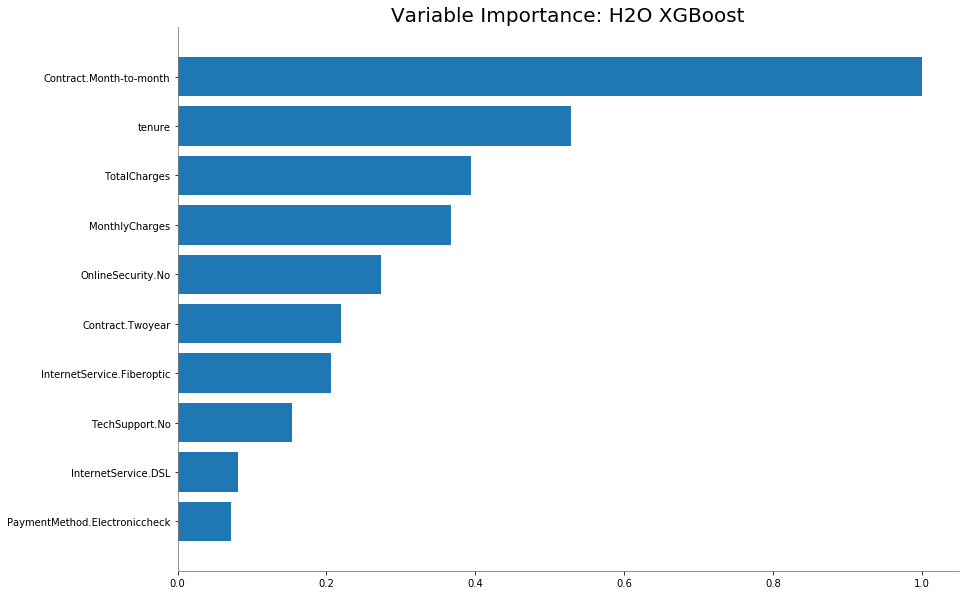

In [36]:
out.varimp_plot()

In [37]:
aml.leader.download_mojo(path = "./")#mojo is a binary file and it can be deployed in python, java programs for fast execution

'/content/XGBoost_3_AutoML_20200316_145325.zip'